In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [4]:
# Read the dataset
df=pd.read_csv('exams.csv')
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group A,some college,standard,none,55,51,56
1,male,group E,high school,free/reduced,none,68,61,58
2,male,group C,associate's degree,standard,none,59,62,56
3,male,group B,associate's degree,free/reduced,none,58,62,57
4,male,group E,some college,standard,none,59,51,46


In [5]:
df.shape

(1000, 8)

Data checks to perform
1. check missing values
2. check duplicates
3. check data type
4. check the number of unique values of each column
5. check statitics of dataset
6. check various categories present in th different categorical column

In [6]:
# check missing values
df.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [7]:
df.isna().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [8]:
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
995    False
996    False
997    False
998    False
999    False
Length: 1000, dtype: bool

In [9]:
df.duplicated().sum()

0

In [10]:
# check datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [11]:
# checking the unique values of each column
df.nunique()

gender                          2
race/ethnicity                  5
parental level of education     6
lunch                           2
test preparation course         2
math score                     76
reading score                  70
writing score                  74
dtype: int64

In [12]:
# check the statistics of the dataset
df.describe()

,math score,reading score,writing score
count,1000.000000,1000.000000,1000.000000
mean,66.100000,69.041000,67.667000
std,15.072132,14.902463,15.524146
min,22.000000,26.000000,23.000000
25%,55.000000,59.000000,57.000000
50%,66.000000,69.000000,68.000000
75%,78.000000,81.000000,79.000000
max,100.000000,100.000000,100.000000


In [13]:
# explore more info about the data
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group A,some college,standard,none,55,51,56
1,male,group E,high school,free/reduced,none,68,61,58
2,male,group C,associate's degree,standard,none,59,62,56
3,male,group B,associate's degree,free/reduced,none,58,62,57
4,male,group E,some college,standard,none,59,51,46


In [14]:
df.tail()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
995,female,group A,associate's degree,standard,none,67,69,67
996,female,group B,some high school,free/reduced,none,56,68,67
997,female,group C,some college,standard,completed,33,44,49
998,male,group D,high school,free/reduced,none,41,41,36
999,female,group C,some college,standard,none,46,60,61


In [16]:
[feature for feature in df.columns if df[feature].dtype!='O']

['math score', 'reading score', 'writing score']

In [17]:
# segregate numerical and categorical feature
numerical_feature=[feature for feature in df.columns if df[feature].dtype!='O']
categorical_feature=[feature for feature in df.columns if df[feature].dtype=='O']

In [18]:
numerical_feature

['math score', 'reading score', 'writing score']

In [19]:
categorical_feature

['gender',
 'race/ethnicity',
 'parental level of education',
 'lunch',
 'test preparation course']

In [20]:
df['gender'].value_counts()

male      511
female    489
Name: gender, dtype: int64

In [22]:
df['race/ethnicity'].value_counts()

group C    324
group D    265
group B    185
group E    138
group A     88
Name: race/ethnicity, dtype: int64

In [23]:
# Aggregate the total score with mean

df['total_score']=(df['math score']+df['reading score']+df['writing score'])
df['average']=df['total_score']/3
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total_score,average
0,female,group A,some college,standard,none,55,51,56,162,54.000000
1,male,group E,high school,free/reduced,none,68,61,58,187,62.333333
2,male,group C,associate's degree,standard,none,59,62,56,177,59.000000
3,male,group B,associate's degree,free/reduced,none,58,62,57,177,59.000000
4,male,group E,some college,standard,none,59,51,46,156,52.000000


<AxesSubplot:xlabel='average', ylabel='Count'>

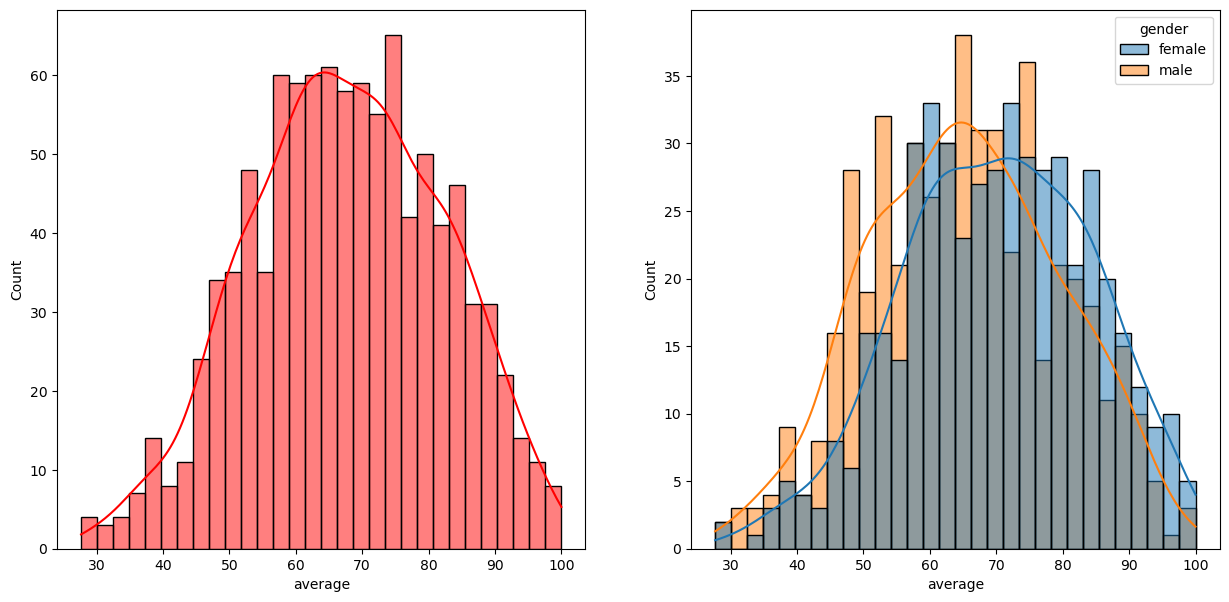

In [26]:
# Explore more visualization
fig,axis=plt.subplots(1,2,figsize=(15,7))
plt.subplot(121)
sns.histplot(data=df,x='average',bins=30,kde=True,color='r')
plt.subplot(122)
sns.histplot(data=df,x='average',bins=30,kde=True,hue='gender')

<AxesSubplot:xlabel='average', ylabel='Count'>

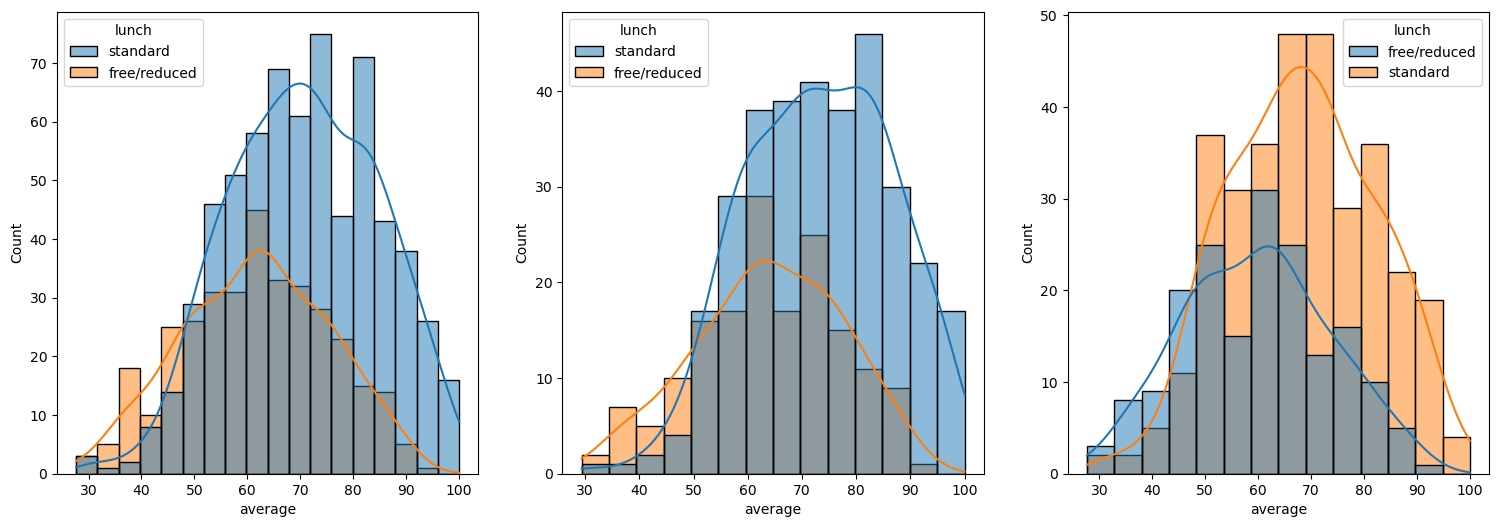

In [31]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
sns.histplot(data=df,x='average',kde=True,hue='lunch')
plt.subplot(142)
sns.histplot(data=df[df.gender=='female'],x='average',kde=True,hue='lunch')
plt.subplot(143)
sns.histplot(data=df[df.gender=='male'],x='average',kde=True,hue='lunch')

In [33]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total_score,average
0,female,group A,some college,standard,none,55,51,56,162,54.000000
1,male,group E,high school,free/reduced,none,68,61,58,187,62.333333
2,male,group C,associate's degree,standard,none,59,62,56,177,59.000000
3,male,group B,associate's degree,free/reduced,none,58,62,57,177,59.000000
4,male,group E,some college,standard,none,59,51,46,156,52.000000


<AxesSubplot:xlabel='average', ylabel='Count'>

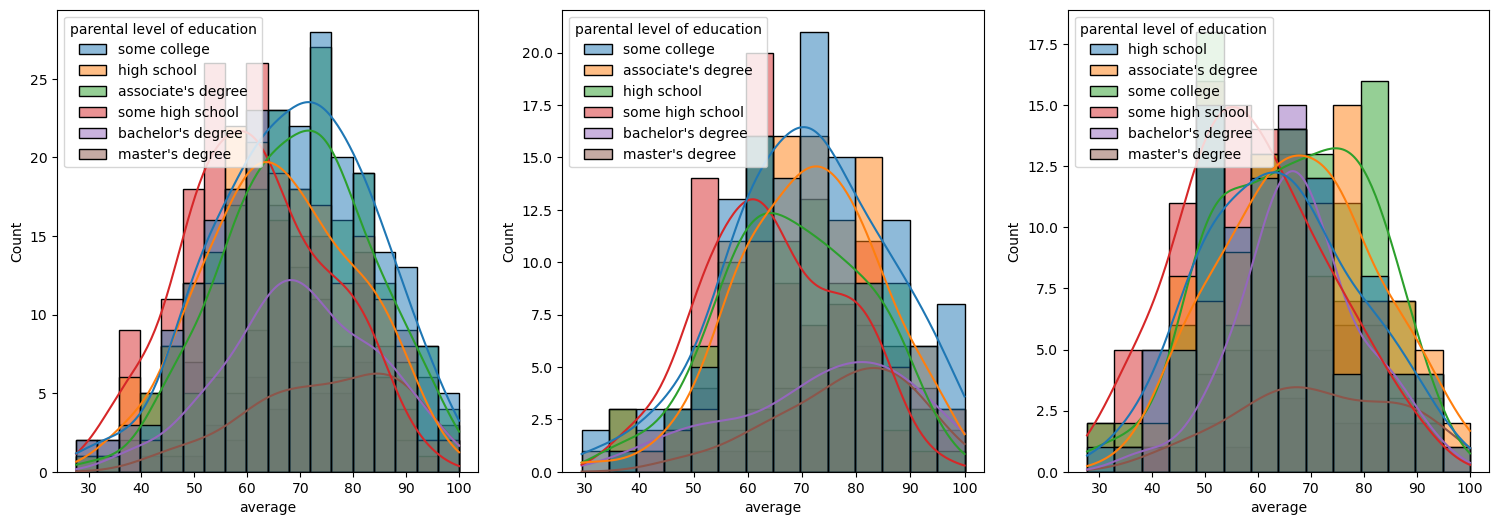

In [34]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
sns.histplot(data=df,x='average',kde=True,hue='parental level of education')
plt.subplot(142)
sns.histplot(data=df[df.gender=='female'],x='average',kde=True,hue='parental level of education')
plt.subplot(143)
sns.histplot(data=df[df.gender=='male'],x='average',kde=True,hue='parental level of education')

<AxesSubplot:xlabel='average', ylabel='Count'>

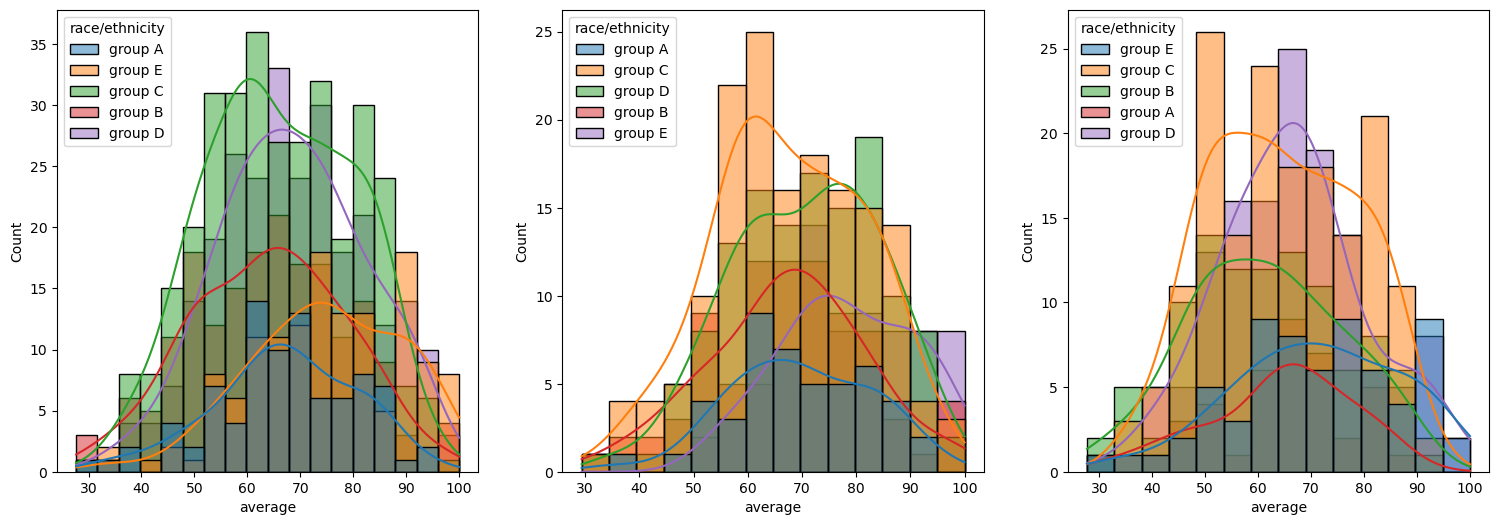

In [35]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
sns.histplot(data=df,x='average',kde=True,hue='race/ethnicity')
plt.subplot(142)
sns.histplot(data=df[df.gender=='female'],x='average',kde=True,hue='race/ethnicity')
plt.subplot(143)
sns.histplot(data=df[df.gender=='male'],x='average',kde=True,hue='race/ethnicity')

<AxesSubplot:>

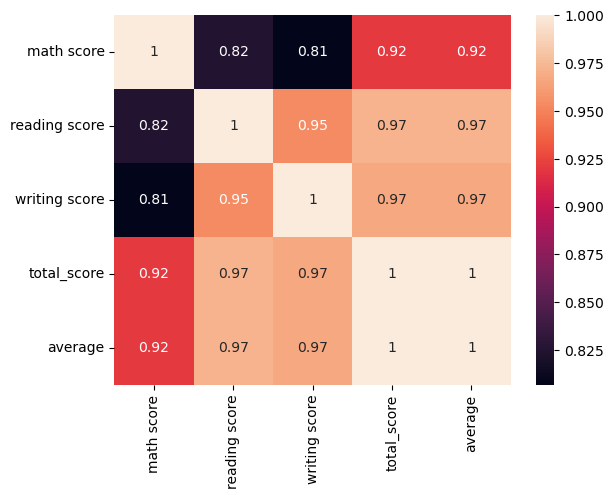

In [36]:
sns.heatmap(df.corr(),annot=True)